In [10]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [11]:
data = pd.read_csv('train.csv')

In [12]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
data = np.array(data)
m,n = data.shape
np.random.shuffle(data)

data_dev=data[0:1000].T
Y_dev=data_dev[0]
X_dev=data_dev[1:n]
X_dev = X_dev / 255.

data_train=data[1000:m].T
Y_train=data_train[0]
X_train=data_train[1:n]
X_train = X_train/255.
_,m_train = X_train.shape

In [66]:
def init_params():
    W1= np.random.rand(10,784) - 0.5
    b1 = np.random.rand(10,1) - 0.5
    W2= np.random.rand(10,10) - 0.5
    b2= np.random.rand(10,1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z,0)

def Softmax(Z):
    return np.exp(Z) / sum(np.exp(Z))


def forward_prop(W1,b1,W2,b2,X):
    Z1=W1.dot(X) + b1
    A1=ReLU(Z1)
    Z2=W2.dot(A1) + b2
    A2 = Softmax(Z2)
    return Z1,A1,Z2,A2

def one_hot(Y):
    one_hot_Y=np.zeros((Y.size,Y.max()+1))
    one_hot_Y[np.arange(Y.size),Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def deriv_ReLU(Z):
    return Z>0

def back_prop(Z1,A1,Z2,A2,W2,X,Y):
    m=Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1/m * dZ2.dot(A1.T)
    db2 = 1/m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1/m * dZ1.dot(X.T)
    db1 = 1/m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1,b1,W2,b2,dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2


In [67]:
def get_predictions(A2):
    return np.argmax(A2,0)

def get_accuracy(predictions,Y):
    print(predictions, Y)
    return np.sum(predictions==Y) / Y.size


def gradient_descent(X,Y,iterations, alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations): 
        Z1,A1,Z2,A2 = forward_prop(W1,b1,W2,b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1,A1,Z2,A2,W2,X,Y)
        W1, b1, W2, b2 = update_params(W1,b1,W2,b2,dW1, db1, dW2, db2, alpha)
        if i%10 == 0:
            print("Iteration:", i)
            print("Accuracy:", get_accuracy(get_predictions(A2), Y))
    return W1, b1, W2, b2

In [68]:
W1,b1,W2,b2=gradient_descent(X_train,Y_train,500,0.1)

Iteration: 0
[9 9 9 ... 9 9 7] [5 0 8 ... 7 4 5]
Accuracy: 0.08219512195121952
Iteration: 10
[7 1 2 ... 9 3 7] [5 0 8 ... 7 4 5]
Accuracy: 0.13160975609756098
Iteration: 20
[7 0 2 ... 9 3 3] [5 0 8 ... 7 4 5]
Accuracy: 0.19121951219512195
Iteration: 30
[3 0 2 ... 9 3 3] [5 0 8 ... 7 4 5]
Accuracy: 0.25782926829268293
Iteration: 40
[3 1 2 ... 9 3 3] [5 0 8 ... 7 4 5]
Accuracy: 0.31878048780487805
Iteration: 50
[3 1 2 ... 9 3 3] [5 0 8 ... 7 4 5]
Accuracy: 0.3720731707317073
Iteration: 60
[3 1 2 ... 9 3 3] [5 0 8 ... 7 4 5]
Accuracy: 0.4313170731707317
Iteration: 70
[3 9 2 ... 7 8 3] [5 0 8 ... 7 4 5]
Accuracy: 0.483
Iteration: 80
[3 9 8 ... 7 8 3] [5 0 8 ... 7 4 5]
Accuracy: 0.5239024390243903
Iteration: 90
[3 9 8 ... 7 8 3] [5 0 8 ... 7 4 5]
Accuracy: 0.5589512195121952
Iteration: 100
[3 9 8 ... 7 8 3] [5 0 8 ... 7 4 5]
Accuracy: 0.5898292682926829
Iteration: 110
[3 5 8 ... 7 8 3] [5 0 8 ... 7 4 5]
Accuracy: 0.6150243902439024
Iteration: 120
[3 5 8 ... 7 8 3] [5 0 8 ... 7 4 5]
Accuracy

In [69]:
def make_predictions(X,W1,b1,W2,b2):
    _,_,_,A2 = forward_prop(W1,b1,W2,b2,X)
    predictions = get_predictions(A2)
    return predictions

def test_predictions(index,W1, b1, W2, b2):
    current_image = X_train[:,index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction:", prediction)
    print("Label:", label)

    current_image = current_image.reshape((28,28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction: [5]
Label: 5


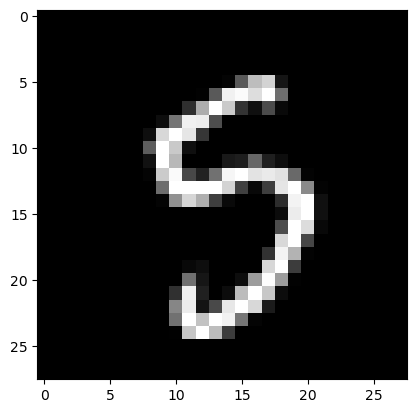

Prediction: [5]
Label: 0


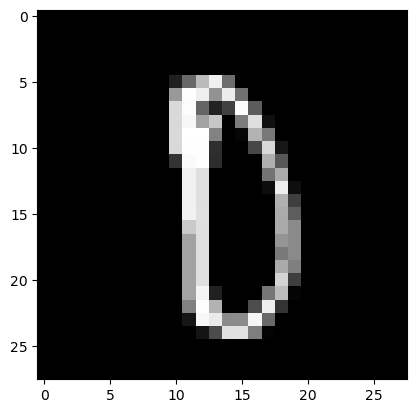

Prediction: [8]
Label: 8


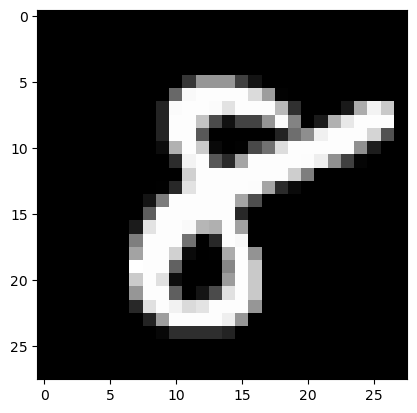

Prediction: [8]
Label: 8


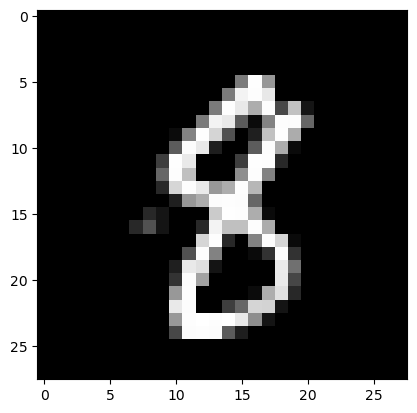

In [70]:
test_predictions(0,W1,b1,W2,b2)
test_predictions(1,W1,b1,W2,b2)
test_predictions(2,W1,b1,W2,b2)
test_predictions(3,W1,b1,W2,b2)

In [71]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[8 9 6 3 1 4 3 0 3 6 9 6 1 9 4 7 4 9 7 5 0 7 6 0 1 5 9 7 3 9 6 0 6 9 5 9 1
 3 6 0 9 0 3 4 5 8 4 5 1 6 5 4 2 9 2 2 8 1 9 0 2 9 1 2 7 7 9 3 4 5 8 7 2 1
 6 3 8 9 2 4 3 3 2 6 6 2 8 7 8 2 7 2 0 7 7 2 0 7 2 2 8 4 5 5 3 7 5 5 6 2 1
 7 6 6 4 0 0 0 0 4 2 1 4 7 2 5 3 7 7 3 1 6 2 7 6 8 8 1 6 2 8 5 5 3 2 6 3 4
 6 3 7 9 4 5 0 1 8 4 1 3 3 9 5 5 0 1 8 6 3 1 8 2 0 9 8 3 7 0 5 3 0 3 8 7 6
 3 6 7 3 3 2 1 5 4 3 7 2 1 4 4 0 3 1 7 4 2 1 4 5 9 4 7 8 6 9 9 7 2 2 5 1 2
 1 6 0 3 4 5 4 4 4 1 6 3 6 7 2 6 6 2 7 9 6 1 2 8 8 6 2 0 9 0 7 5 1 7 1 6 1
 4 8 9 3 3 0 8 4 4 8 4 3 0 2 5 0 2 4 7 7 6 6 9 6 1 5 1 9 8 8 1 9 5 6 1 9 6
 2 1 4 1 1 9 2 9 2 0 3 5 4 2 6 0 8 2 9 9 6 4 5 0 5 8 4 8 0 7 9 4 0 7 0 8 4
 9 8 4 2 2 3 7 4 2 8 2 4 4 6 8 7 4 1 8 1 0 4 3 1 8 5 0 8 6 2 3 9 1 6 5 9 3
 1 3 4 1 6 6 2 2 1 4 9 0 2 3 5 7 0 8 4 2 0 1 7 6 4 2 2 1 7 2 8 1 8 1 6 7 0
 1 5 4 9 4 9 4 9 1 4 7 7 3 3 6 4 9 8 3 1 7 0 8 3 7 5 2 6 4 8 0 1 8 1 1 9 3
 3 4 0 9 4 3 1 9 0 9 3 6 7 1 9 2 3 2 1 2 3 3 6 6 7 7 0 0 2 0 9 7 7 6 2 8 4
 1 0 4 7 6 3 9 8 1 5 7 9 

0.83